In [6]:
import os
from datasets import load_dataset, load_from_disk
import matplotlib.pyplot as plt
import numpy as np

ROOT = '../data'
DATASET_ID = 'orcamath'
DATA_DIR = f'{ROOT}/{DATASET_ID}'

## OrcaMath

In this notebook, we explore and filter the OrcaMath dataset.

HF: https://huggingface.co/datasets/microsoft/orca-math-word-problems-200k

Paper: https://arxiv.org/pdf/2402.14830

In [8]:
if not os.path.isdir(DATA_DIR):
    orca_math = load_dataset('microsoft/orca-math-word-problems-200k')
    orca_math = orca_math['train']
    orca_math.save_to_disk(DATA_DIR)
else:
    orca_math = load_from_disk(DATA_DIR)

Let's have a look

In [80]:
print(orca_math)

Dataset({
    features: ['question', 'answer'],
    num_rows: 200035
})


In [81]:
print(orca_math[0])

{'question': 'Jungkook is the 5th place. Find the number of people who crossed the finish line faster than Jungkook.', 'answer': 'If Jungkook is in 5th place, then 4 people crossed the finish line faster than him.'}


How long are they?

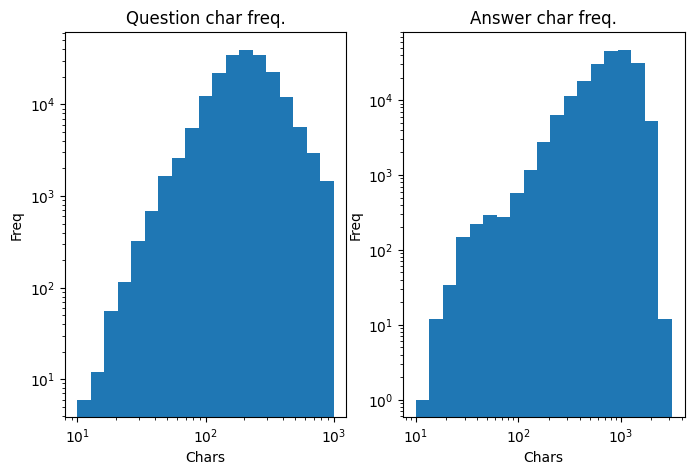

In [82]:
# Histogram of question/answer lengths
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ax1, ax2 = axs

ax1.hist(list(map(len, orca_math['question'])), bins=np.logspace(1, 3, 20), )
ax2.hist(list(map(len, orca_math['answer'])), bins=np.logspace(1, 3.5, 20))

ax1.set_xlabel('Chars')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Freq')
ax1.set_title('Question char freq.')
ax2.set_xlabel('Chars')
ax2.set_ylabel('Freq')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Answer char freq.')

plt.show()

Let's try filtering the answers based on length (>1000 chars), in an attempt to only retain harder question-answer pairs.

In [83]:
orca_math_filtered = orca_math.filter(lambda s: len(s['answer']) >= 1000)
len(orca_math_filtered)

73474